In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#import geopandas
#import descartes
import numpy as np

#import folium
#import seaborn as sns

from scipy.stats import pearsonr

%matplotlib inline

/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#expDF = pd.read_csv('data/BehaviorSpace/table.csv')
#expDF = pd.read_csv('data/BehaviorSpace/street_robbery experiment_90_days-table.csv')
#expDF = pd.read_csv('data/BehaviorSpace/run1year/street_robbery-1year.csv')
expDF = pd.read_csv('data/BehaviorSpace/run1year/experiment_1_year.csv')

expDF.rename(columns={'(list (report-crimes-per-hour) (total-crimes))': 'results', 
                      '[step]':'step', '[run number]':'run_number'}, inplace=True)

In [3]:
# Getting the total of robberies
total_robberies_temp = expDF.results.str.split(']', expand=True)
# Converting all values to int and adding to the DF
expDF['num_crimes'] = total_robberies_temp[1].str.strip().astype(int)

In [4]:
# Convert the crimes distribution vector to a python list
expDF['crimes_dist'] = [list(map(int, i.split(' '))) for i in total_robberies_temp[0].str.split('[', expand=True)[2]]
# Delete the column results
expDF.drop(['results'], axis=1, inplace=True)

In [5]:
expDF.head(2)

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,attractiveness-sf,num-people,graphics-view,step,num_crimes,crimes_dist
0,1,0.1,0.01,0.1,20,0,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,0.1,0.01,0.1,20,0,10000,False,1,5,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
# Get only the final step of the simulation
expDF_Final = expDF[expDF.step == max(expDF.step)]

In [7]:
expDF_Final.reset_index(drop=True, inplace=True)

In [8]:
expDF_Final

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,attractiveness-sf,num-people,graphics-view,step,num_crimes,crimes_dist
0,4,0.1,0.05,0.1,20,0,10000,False,52703,653,"[41, 25, 11, 12, 41, 48, 76, 79, 44, 31, 21, 1..."
1,8,0.1,0.10,0.5,20,0,10000,False,52703,33,"[3, 6, 2, 2, 2, 5, 5, 3, 0, 1, 0, 0, 0, 1, 0, ..."
2,6,0.1,0.05,0.9,20,0,10000,False,52703,17,"[5, 0, 1, 1, 4, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ..."
3,2,0.1,0.01,0.5,20,0,10000,False,52703,36,"[11, 1, 1, 3, 1, 4, 2, 0, 1, 0, 3, 1, 0, 0, 0,..."
4,5,0.1,0.05,0.5,20,0,10000,False,52703,37,"[12, 3, 1, 1, 2, 4, 1, 2, 2, 0, 2, 0, 0, 0, 0,..."
5,7,0.1,0.10,0.1,20,0,10000,False,52703,696,"[50, 32, 14, 9, 36, 58, 85, 81, 63, 42, 33, 19..."
6,3,0.1,0.01,0.9,20,0,10000,False,52703,16,"[2, 0, 1, 0, 2, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, ..."
7,1,0.1,0.01,0.1,20,0,10000,False,52703,677,"[53, 32, 9, 16, 41, 55, 73, 71, 59, 37, 25, 15..."
8,9,0.1,0.10,0.9,20,0,10000,False,52703,16,"[4, 0, 0, 1, 2, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, ..."
9,11,0.5,0.01,0.5,20,0,10000,False,52703,38,"[9, 3, 0, 0, 4, 3, 1, 2, 3, 1, 1, 0, 0, 0, 0, ..."


In [9]:
empData = [13, 13, 19, 19, 9, 9, 2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 4, 4, 9, 9, 25, 25, 19, 19]

In [10]:
corr, p_value = pearsonr(empData, expDF_Final.crimes_dist[0])
corr, p_value

(0.05772754533777451, 0.7887516135667377)

Text(0, 0.5, 'Simulated Data')

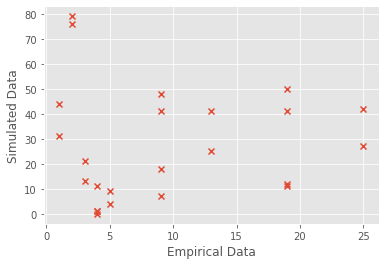

In [11]:
plt.scatter(empData, expDF_Final.crimes_dist[0], marker='x')
plt.xlabel('Empirical Data')
plt.ylabel('Simulated Data')

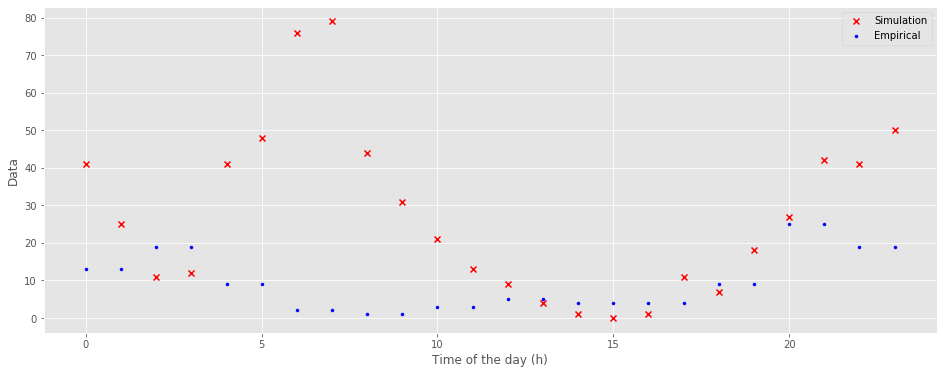

In [12]:
x = range(0,24)
plt.figure(figsize=((16,6)))
plt.scatter(x, expDF_Final.crimes_dist[0], marker='x', c='red', label='Simulation')
plt.xlabel('Time of the day (h)')
plt.ylabel('Data')
plt.scatter(x, empData, marker='.', c='blue', label='Empirical')
plt.legend()


In [13]:
expDF_Final['corr'] = [pearsonr(empData, row['crimes_dist'])[0] 
                       for index, row in expDF_Final.iterrows() ]
expDF_Final['p_value'] = [pearsonr(empData, row['crimes_dist'])[1] 
                          for index, row in expDF_Final.iterrows() ]

/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
expDF_Final[['crimes_dist','corr', 'p_value']]

,crimes_dist,corr,p_value
0,"[41, 25, 11, 12, 41, 48, 76, 79, 44, 31, 21, 1...",0.057728,0.788752
1,"[3, 6, 2, 2, 2, 5, 5, 3, 0, 1, 0, 0, 0, 1, 0, ...",0.031846,0.882562
2,"[5, 0, 1, 1, 4, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...",0.159804,0.455729
3,"[11, 1, 1, 3, 1, 4, 2, 0, 1, 0, 3, 1, 0, 0, 0,...",0.327176,0.118625
4,"[12, 3, 1, 1, 2, 4, 1, 2, 2, 0, 2, 0, 0, 0, 0,...",0.182454,0.393483
5,"[50, 32, 14, 9, 36, 58, 85, 81, 63, 42, 33, 19...",-0.129232,0.547282
6,"[2, 0, 1, 0, 2, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...",0.229303,0.281112
7,"[53, 32, 9, 16, 41, 55, 73, 71, 59, 37, 25, 15...",0.010826,0.959959
8,"[4, 0, 0, 1, 2, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, ...",0.125754,0.558205
9,"[9, 3, 0, 0, 4, 3, 1, 2, 3, 1, 1, 0, 0, 0, 0, ...",0.276286,0.191255


In [20]:
list(expDF_Final[expDF_Final.p_value < 0.1].crimes_dist)

[[0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2]]

In [19]:
expDF_Final[expDF_Final.p_value < 0.1]

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,attractiveness-sf,num-people,graphics-view,step,num_crimes,crimes_dist,corr,p_value
11,12,0.5,0.01,0.9,20,0,10000,False,52703,16,"[0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, ...",0.443899,0.029786
